**4. (Nearest neighbors in lower dimensions) To illustrate a possible use of PCA-based dimensionality reduction, we consider the problem of face classification. The nearest-neighbor algorithm is a classical method to perform classification. When applied on $d$ -dimensional points, it requires computing distances in $d$ dimensions, which can. be very computationally expensive if $d$ is large. Here you will use PCA to perform nearest neighbors in a lower-dimensional space. You will find the relevant code in the folder faces.**


Create a new file in which to write the code for the remaining questions. Include all plots in your submitted homework.




## (a)
**Complete the compute_nearest_neighbors () function in nearest_neighbors.py that finds the image in the training data that is closest to a given test image. Include the generated images in your submitted homework. In this question, do not apply dimensionality reduction.**

In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import plot_tools

def compute_nearest_neighbors(train_matrix, testImage):
    dist=np.sqrt(((train_matrix-testImage)**2).sum(axis=1))
    idx_of_closest_point_in_train_matrix=np.argmin(dist)
    #print(np.argmin(dist))
            ## fill your code here. feel free to modify the signature of the function if required. 
    return idx_of_closest_point_in_train_matrix

In [2]:
test_idx = [1,  87,  94, 78] #use this

data = fetch_olivetti_faces()
targets = data.target
data = data.images.reshape((len(data.images), -1))

train_idx = np.array(list(set(list(range(data.shape[0]))) - set(test_idx) ) )
train_set = data[train_idx ]
y_train = targets[train_idx] 
test_set = data[np.array(test_idx)]
y_test = targets[ np.array(test_idx)]
imgs = []
estLabels = []
for i in range(test_set.shape[0]):
    #print(i)
    testImage = test_set[i, :]
    nnIdx = compute_nearest_neighbors(train_set, testImage)
    imgs.extend( [testImage, train_set[nnIdx,:]] )
    estLabels.append(y_train[nnIdx])

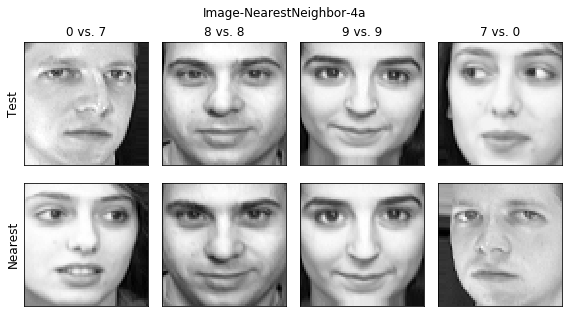

In [3]:

row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(y_test, estLabels)]
plot_tools.plot_image_grid(imgs,
                "Image-NearestNeighbor-4a",
                (64,64), len(test_set),2,True,row_titles=row_titles,col_titles=col_titles)

## (b)
**Generate a plot of $k$ vs. $\sigma_{k}^{2},$ where $\sigma_{k}^{2}$ is the variance of the $k$ th principal component of the data (e.g., $\sigma_{1}^{2}$ is the largest variance). You can limit the x axis to a reasonable number.**


In [4]:
import matplotlib.pyplot as plt

In [5]:
#do the PCA
data = fetch_olivetti_faces()
data = data.images.reshape((len(data.images), -1))
cov=np.cov(data.T)

train_eigenval,train_eigenvec= np.linalg.eig(cov)

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


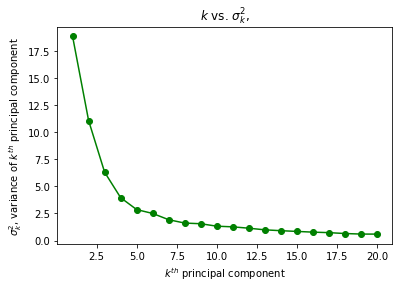

In [15]:
plt.plot(np.arange(1,21,1), train_eigenval[:20],"go-")
plt.title("$k$ vs. $\sigma_{k}^{2},$")
plt.xlabel("$k^{th}$ principal component")
plt.ylabel("$\sigma_{k}^{2}$, variance of $k^{th}$ principal component");
plt.savefig("k_vs_variacne_4b.png")

## (c)
**Plot (using plot_image_grid() in plot_tools.py ) the vectors corresponding to the top 10 principal directions of the data. Your principal direction vectors should be elements of $\mathbb{R}^{4096}$ (i.e., they should represent images).**

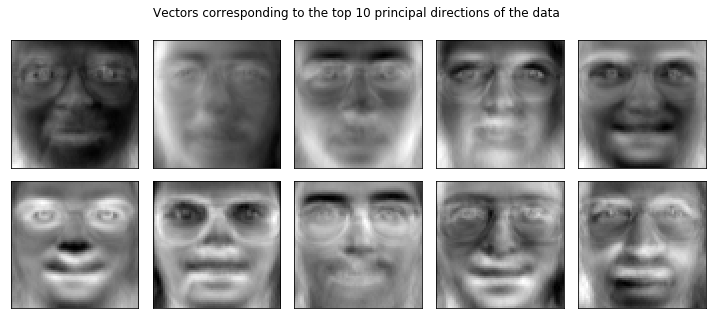

In [7]:
plot_tools.plot_image_grid(train_eigenvec.real.T[:10], "Vectors corresponding to the top 10 principal directions of the data",
                           image_shape=(64,64),n_col=5, n_row=2, bycol=0, row_titles=None,col_titles=None)

## d) 

**Use the variance of principal directions plot to determine a relatively small number $k$ of principal components that explains the training data reasonably well. Project the training data and the test data onto the first $k$ principal components, and run nearest neighbors for each test image in this lower dimensional space. Include your choice for $k,$ and the plots of your nearest neighbor results in your submitted homework document. You should use the code from nearest_neighbors .py to generate your image plots.**

In [8]:
from sklearn.decomposition import PCA

In [9]:
def project_k(main_set,k):
    pca=PCA(k)
    pca.fit_transform(data)
    top_n_princ=pca.components_[:k,:]
    main_set_proj=np.matmul(top_n_princ,main_set.T)
    return np.transpose(main_set_proj)

In [10]:
train_project=project_k(train_set,10)
test_project=project_k(test_set,10)

nnIdx_total =[]

for i in range(test_project.shape[0]):
    testImage= test_project[i,:]
    nnIdx = compute_nearest_neighbors(train_project, testImage)
    nnIdx_total.append(nnIdx)
nnIdx_total

[77, 81, 93, 392]

In [11]:
imgs = []
estLabels = []
for i in range(test_set.shape[0]):
    testImage = test_set[i, :]
        
    nnIdx = nnIdx_total[i]
        
    imgs.extend( [testImage, train_set[nnIdx,:]] )
    estLabels.append(y_train[nnIdx])

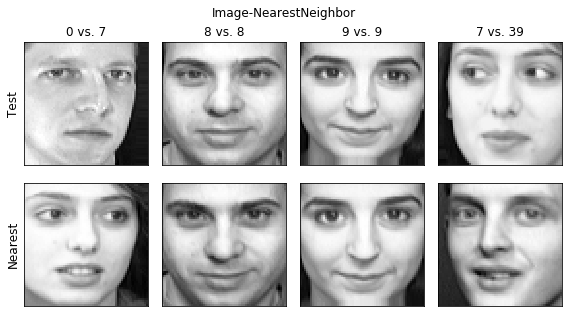

In [12]:
row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(y_test, estLabels)]
plot_tools.plot_image_grid(imgs,
                "Image-NearestNeighbor",
                (64,64), len(test_set),2,True,row_titles=row_titles,col_titles=col_titles)

## e) 


**Let's explicitly study how accuracy changes with the number of principal components $k$ used to project before computing nearest neighbhor. We will divide our dataset of 400 elements into 350 for training and 50 for test and compute the classification accuracy of these 50 with different values of $k .$ The indices of 50 test elements and the minimum set of $k$ values are specified as comments at the end of nearest_neighbors.py. Please feel free to include more $k$ values. Generate a plot of accuracy vs $k$**



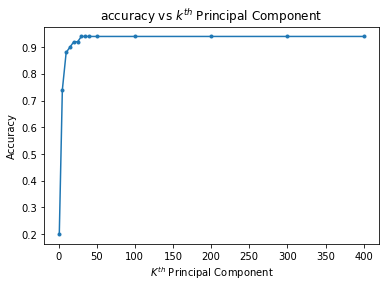

In [13]:
test_idx = [207, 209, 396,  10,  15, 334, 101, 286, 255, 305,  37,  38,  97,
            331, 227, 347,  45, 105, 151,  65, 265, 217,  19, 238,  56, 378,
            3, 316, 246,  69, 179, 303, 250, 103, 337, 145, 183, 236,  71,
            354, 395, 281,  81, 350, 301, 381,  67, 297, 205, 358] #use this test indices
k_values_4e = [1, 5, 10, 15, 20, 25, 30, 35, 40, 50, 100, 200, 300, 400]  #use atleast these many k values. can add to this


train_idx = np.array(list(set(list(range(data.shape[0]))) - set(test_idx) ) )

train_set = data[train_idx ]
y_train = targets[train_idx] 
test_set = data[np.array(test_idx)]
y_test = targets[ np.array(test_idx)]
accuracy_total = []

for k in k_values_4e :
        
    train_project=project_k(train_set,k )
    test_project=project_k(test_set,k )
    
    
    imgs = []
    estLabels = []
    for i in range(test_project.shape[0]):
        testImage= test_project[i,:]
        nnIdx = compute_nearest_neighbors(train_project, testImage)
        imgs.extend( [testImage, train_set[nnIdx,:]] )
        estLabels.append(y_train[nnIdx])
        
        
    accuracy = np.sum(np.equal(estLabels,y_test))/len(y_test)
    accuracy_total.append(accuracy)
        
            
plt.plot(k_values_4e,accuracy_total,'.-')
plt.title("accuracy vs $k^{th}$ Principal Component")
plt.xlabel("$K^{th}$ Principal Component")
plt.ylabel("Accuracy");
plt.savefig("accuracy_vs_kth_principal_component_4e.png")



## f)

**Repeat the analysis above, but now with a train and test dataset that is corrupted by Gaussian noise with standard deviation $150 / 255 .$ Sample code for corrupting the data is provided in nearest_neighbors.py. Do you observe a similar pattern as in the previous part? Can you explain what you are observing?**

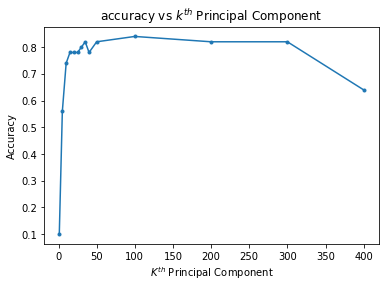

In [14]:
train_set_no = train_set + np.random.randn(*train_set.shape)*(150/255)
test_set_no = test_set + np.random.randn(*test_set.shape)*(150/255)
    
accuracy_total = []

for k in k_values_4e:
        
    train_project=project_k(train_set_no ,k )
    test_project=project_k(test_set_no ,k )
    
    imgs = []
    estLabels = []
    for i in range(test_project.shape[0]):
        testImage= test_project[i,:]
        nnIdx = compute_nearest_neighbors(train_project, testImage)
        imgs.extend( [testImage, train_set[nnIdx,:]] )
        estLabels.append(y_train[nnIdx])
        
        
    accuracy = np.sum(np.equal(estLabels,y_test))/len(y_test)
    accuracy_total.append(accuracy)
        
            
plt.plot(k_values_4e,accuracy_total,'.-')
plt.title("accuracy vs $k^{th}$ Principal Component")
plt.xlabel("$K^{th}$ Principal Component")
plt.ylabel("Accuracy");
plt.savefig("accuracy_with_noisy_vs_kth_principal_component_4f.png")